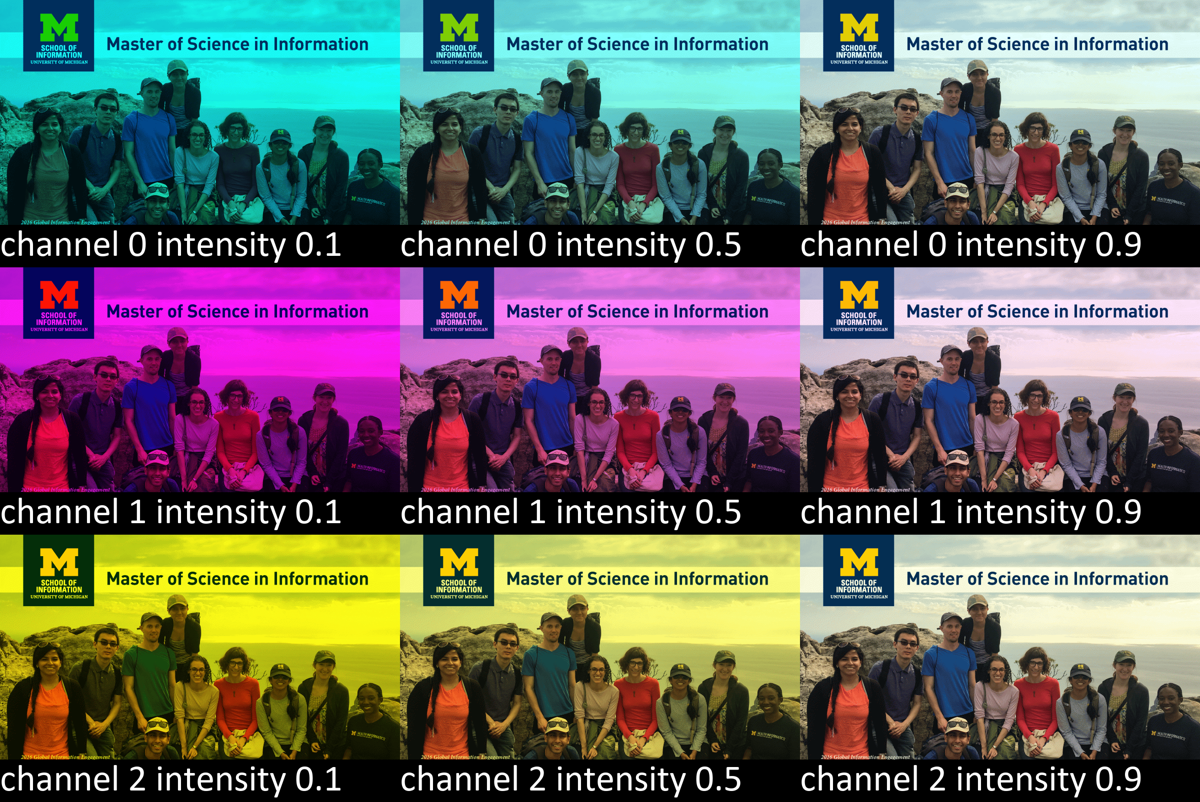

In [5]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageFont, ImageDraw
# read image and convert to RGB
image=Image.open("week1/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different color
lables=[]
images=[]
for i in range(3):
    for j in (0.1,0.5,0.9):
        source = image.split()
        mid = source[i].point(lambda x:x*j)
        source[i].paste(mid)
        im = Image.merge(image.mode, source)
        lables.append('channel {} intensity {}'.format(i,j))
        images.append(im)
font = ImageFont.truetype("week1/calibri.ttf",75)

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3+3*85))
x=0
y=0
draw = ImageDraw.Draw(contact_sheet)
for i,img in enumerate(images):
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    draw.text((x,y+first_image.height+5), lables[i], font=font)
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height+85
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)